<a href="https://colab.research.google.com/github/ASRC-com/ML-project/blob/main/Basic_Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

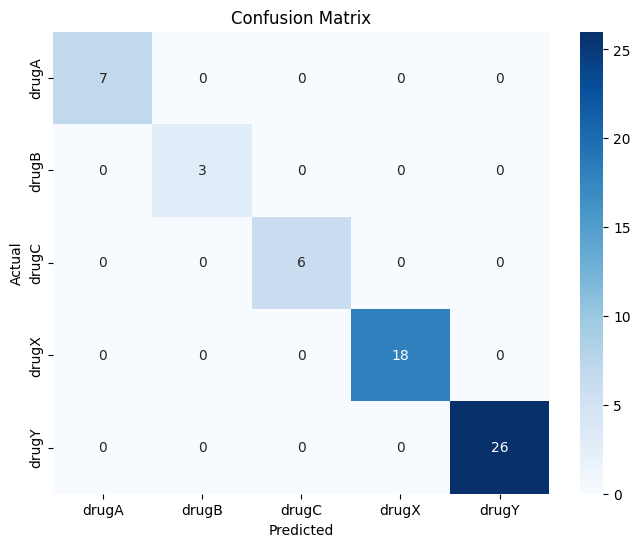

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Test Case Prediction: drugY


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drug200.csv')

le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_Chol = LabelEncoder()
le_Drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_BP.fit_transform(df['BP'])
df['Cholesterol'] = le_Chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_Drug.fit_transform(df['Drug'])

X = df.drop('Drug', axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=le_Drug.classes_, yticklabels=le_Drug.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_Drug.classes_))

test_case = pd.DataFrame({
    'Age': [30],
    'Sex': [le_sex.transform(['F'])[0]],
    'BP': [le_BP.transform(['HIGH'])[0]],
    'Cholesterol': [le_Chol.transform(['NORMAL'])[0]],
    'Na_to_K': [15.5]
})

predicted_drug = dt_model.predict(test_case)
print(f'Test Case Prediction: {le_Drug.inverse_transform(predicted_drug)[0]}')
